<a href="https://colab.research.google.com/github/psgrigoletti/cursos-colab/blob/main/Curso_de_Deep_Learning_parte_2_como_a_rede_aprende.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Deep Learning parte 2: como a rede aprende

Curso: https://cursos.alura.com.br/course/deep-learning-como-a-rede-aprende/

Projeto no git: https://github.com/cassiasamp/keras-tensorflow-2/

In [11]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [12]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [13]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

In [14]:
imagens_treino = imagens_treino/float(255)
imagens_teste = imagens_teste/float(255) 

In [15]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5223 - accuracy: 0.8151 - val_loss: 0.4025 - val_accuracy: 0.8544
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3984 - accuracy: 0.8550 - val_loss: 0.3720 - val_accuracy: 0.8621
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3616 - accuracy: 0.8665 - val_loss: 0.3530 - val_accuracy: 0.8712
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3386 - accuracy: 0.8754 - val_loss: 0.3548 - val_accuracy: 0.8695
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3219 - accuracy: 0.8821 - val_loss: 0.3307 - val_accuracy: 0.8814


# Sumário do modelo

In [23]:
sumario_do_modelo = modelo.summary() # resumo do modelo

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Pesos da primeira camada Dense

In [29]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.06204138,  0.06464661, -0.07813358, ..., -0.02070231,
         0.11706514,  0.08932243],
       [ 0.03863159,  0.08035568, -0.08651534, ...,  0.13153744,
        -0.07326132, -0.01695209],
       [ 0.15742059,  0.20607187, -0.06192109, ...,  0.09037412,
        -0.2831139 ,  0.07886624],
       ...,
       [ 0.14687924,  0.15629289, -0.02407904, ..., -0.0222419 ,
        -0.13459267,  0.16357589],
       [ 0.15537384, -0.0711503 ,  0.13157676, ...,  0.02524221,
        -0.09120568,  0.3822227 ],
       [ 0.03183682, -0.00077198, -0.00665693, ...,  0.06841867,
        -0.2404353 ,  0.38887885]], dtype=float32)

# Vieses da primeira camada Dense

In [30]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([ 0.07490485,  0.3077419 ,  0.04908099, -0.08235181, -0.25526384,
        0.17413263, -0.02064081, -0.00825762, -0.09623387,  0.13103941,
        0.2901423 , -0.0123888 ,  0.4338987 , -0.33973473, -0.01782738,
        0.08302748,  0.12895876, -0.00566716, -0.01327462,  0.19135332,
       -0.01052341,  0.11991823,  0.4611936 ,  0.15080544,  0.16447546,
       -0.08211354,  0.18621707,  0.04574968,  0.11504319,  0.22746623,
        0.00388886, -0.01192394,  0.1591919 ,  0.31131205, -0.2954763 ,
       -0.15658519, -0.10962863,  0.57436454, -0.03566603,  0.01466554,
       -0.27815244,  0.26008475, -0.25040275,  0.18189935, -0.21102321,
        0.30161864,  0.18541454,  0.00613528, -0.19293672,  0.0757959 ,
        0.4019869 , -0.01712605,  0.15320161,  0.21723877,  0.21567504,
        0.15303823,  0.11572567,  0.06153271,  0.16832374,  0.10413539,
       -0.35272396,  0.06295606, -0.08541155,  0.33232674, -0.17227192,
        0.08401037, -0.02061965,  0.18766852,  0.2246231 , -0.01

# Zerando pesos da primeira camada Dense

In [35]:
pesos_camada_dense_zerados = np.zeros(pesos_camada_dense.shape)
pesos_camada_dense_zerados
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])
modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([ 0.07490485,  0.3077419 ,  0.04908099, -0.08235181, -0.25526384,
         0.17413263, -0.02064081, -0.00825762, -0.09623387,  0.13103941,
         0.2901423 , -0.0123888 ,  0.4338987 , -0.33973473, -0.01782738,
         0.08302748,  0.12895876, -0.00566716, -0.01327462,  0.19135332,
        -0.01052341,  0.11991823,  0.4611936 ,  0.15080544,  0.16447546,
        -0.08211354,  0.18621707,  0.04574968,  0.11504319,  0.22746623,
         0.00388886, -0.01192394,  0.1591919 ,  0.31131205, -0.2954763 ,
        -0.15658519, -0.10962863,  0.57436454, -0.03566603,  0.01466554,
        -0.27815244,  0.26008475, -0.25040275,  0.18189935, -0.21102321,
         0.30161864,  0.18541454,  0.00613528, -0.19293672,  0.0757959 ,
      

# Rodando modelo com pesos zerados

In [36]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5339 - accuracy: 0.8103 - val_loss: 0.4114 - val_accuracy: 0.8518
Epoch 2/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4054 - accuracy: 0.8526 - val_loss: 0.3705 - val_accuracy: 0.8669
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3749 - accuracy: 0.8632 - val_loss: 0.3584 - val_accuracy: 0.8708
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3509 - accuracy: 0.8692 - val_loss: 0.3750 - val_accuracy: 0.8633
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3338 - accuracy: 0.8770 - val_loss: 0.3538 - val_accuracy: 0.8718


In [37]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

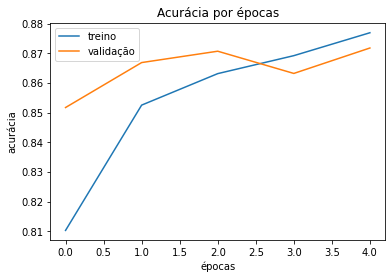

In [38]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

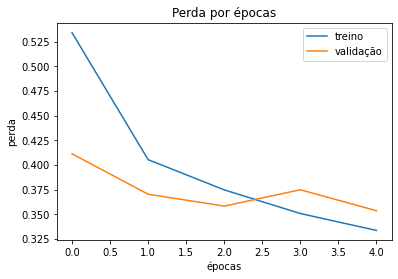

In [39]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [21]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


In [22]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 0.3633 - accuracy: 0.8714
Perda do teste: 0.3633272051811218
Acurácia do teste: 0.871399998664856
